### Import plotting modules

In [206]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import datasets
from math import sqrt
from scipy.stats import skew,norm
from scipy.stats import skew
import math

### 1)	Read the enclosed file, bmi_region.csv

In [119]:
bmi_df = pd.read_csv('bmi_region.csv', sep = ',', header = 0)

In [120]:
bmi_df.head()

,Region,bmi
0,Andhra Pradesh,20
1,Andhra Pradesh,20
2,Andhra Pradesh,24
3,Andhra Pradesh,25
4,Andhra Pradesh,26


In [121]:
bmi_df.tail()

,Region,bmi
17495,Puducherry,22
17496,Puducherry,19
17497,Puducherry,27
17498,Puducherry,20
17499,Puducherry,23


In [122]:
# get the type
type(bmi_df)

pandas.core.frame.DataFrame

In [123]:
# use .info() to get brief information about the dataframe 
bmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 2 columns):
Region    17500 non-null object
bmi       17500 non-null int64
dtypes: int64(1), object(1)
memory usage: 273.5+ KB


### a.	Use bmi_df.groupby() get region-wise measures such as:   -  
### i.	Mean and median 


In [124]:
# use .describe() to get statistics for all numeric columns
bmi_df.groupby(['Region'])['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
A & N Islands,500.0,22.522,2.928253,18.0,20.0,23.0,25.0,27.0
Andhra Pradesh,500.0,22.708,2.864812,18.0,20.0,23.0,25.0,27.0
Arunachal Pradesh,500.0,22.708,2.912680,18.0,20.0,23.0,25.0,27.0
Assam,500.0,22.286,2.907423,18.0,20.0,22.0,25.0,27.0
Bihar,500.0,22.486,2.918019,18.0,20.0,22.5,25.0,27.0
Chandigarh,500.0,22.536,2.900609,18.0,20.0,23.0,25.0,27.0
Chhattisgarh,500.0,22.188,2.892298,18.0,20.0,22.0,25.0,27.0
D & N Haveli,500.0,22.416,2.781802,18.0,20.0,22.0,25.0,27.0
Daman & Diu,500.0,22.572,2.856069,18.0,20.0,23.0,25.0,27.0


In [125]:
bmi_df_mean =bmi_df.groupby(['Region'])['bmi'].mean()  #mean
bmi_df_mean.head()

Region
A & N Islands        22.522
Andhra Pradesh       22.708
Arunachal Pradesh    22.708
Assam                22.286
Bihar                22.486
Name: bmi, dtype: float64

In [126]:
bmi_df_median = bmi_df.groupby(['Region'])['bmi'].median()  #median of groupby
bmi_df_median.head()

Region
A & N Islands        23.0
Andhra Pradesh       23.0
Arunachal Pradesh    23.0
Assam                22.0
Bihar                22.5
Name: bmi, dtype: float64

In [127]:
bmi = bmi_df.groupby(['Region']).agg(['mean', 'median'])
bmi.head()

bmi       
                     mean median
Region                          
A & N Islands      22.522   23.0
Andhra Pradesh     22.708   23.0
Arunachal Pradesh  22.708   23.0
Assam              22.286   22.0
Bihar              22.486   22.5

### ii.	Standard deviation, coefficient of variation, and Z scores

In [128]:
print('Standard deviation bmi : {0}'.format(bmi_df.bmi.std()))  #std of whole dat

Standard deviation bmi : 2.8774368825519225


In [129]:
print('Variance fare : {0}'.format(bmi_df.bmi.var()))  # var of wholedata

Variance fare : 8.279643013070126


In [130]:
bmi_std = bmi_df.groupby(['Region'])['bmi'].std()
bmi_std.head()  #standard deviation of groupby

Region
A & N Islands        2.928253
Andhra Pradesh       2.864812
Arunachal Pradesh    2.912680
Assam                2.907423
Bihar                2.918019
Name: bmi, dtype: float64

In [131]:
bmi = bmi_df.groupby(['Region']).agg(['std'])
bmi.head()

,bmi
,std
Region,
A & N Islands,2.928253
Andhra Pradesh,2.864812
Arunachal Pradesh,2.912680
Assam,2.907423
Bihar,2.918019


In [132]:
bmi_cov = bmi_df.groupby(['Region']).apply(lambda x: np.std(x) / np.mean(x))   #coefficient of variation
bmi_cov.head()

,bmi
Region,
A & N Islands,0.129887
Andhra Pradesh,0.126033
Arunachal Pradesh,0.128138
Assam,0.130329
Bihar,0.129641


In [133]:
#finding Z Score
bmi = bmi_df
bmi.head()
bmi['bmi']
bmi["bmi_zscore"] = (bmi['bmi'] - bmi['bmi'].mean())/bmi['bmi'].std(ddof=0)
bmi = bmi.groupby(['Region'])
bmi.head(5)

,Region,bmi,bmi_zscore
0,Andhra Pradesh,20,-0.862677
1,Andhra Pradesh,20,-0.862677
2,Andhra Pradesh,24,0.527488
3,Andhra Pradesh,25,0.875030
4,Andhra Pradesh,26,1.222571
500,Arunachal Pradesh,25,0.875030
501,Arunachal Pradesh,18,-1.557760
502,Arunachal Pradesh,25,0.875030
503,Arunachal Pradesh,18,-1.557760
504,Arunachal Pradesh,18,-1.557760


### b.	Are there any outliers? You can use Z scores to detect outliers

In [134]:
def detect_outlier(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [135]:
outlier_datapoints = detect_outlier(bmi_df.bmi)
print(outlier_datapoints)

(array([], dtype=int64),)


### c.	Draw a boxplot and check if there are any outliers

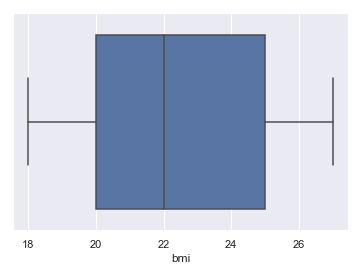

In [155]:
import seaborn as sns
sns.set(style="darkgrid")
sns.boxplot(x=bmi_df["bmi"])

In [137]:
bmi_df['bmi'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0    18.0
0.1    19.0
0.2    19.0
0.3    20.0
0.4    21.0
0.5    22.0
0.6    23.0
0.7    24.0
0.8    26.0
0.9    27.0
1.0    27.0
Name: bmi, dtype: float64

### d.	Draw a histogram. Are there data skewed? If so, how?  

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


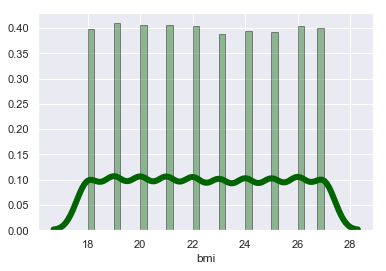

In [138]:
sns.distplot(bmi_df['bmi'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 6})

### e.	Based on the results of (a) through (e), what conclusions can you reach concerning bmi in regions in India

#### based on the results of (a) through (e),we can conclude by concerning bmi in regions of india that all the indian citizens are in good health condition beacuse we can see by visualization that the values in IQR and distribution is in  normal.

## 2)	For this problem, we are using a built-in Boston housing dataset which is a famous dataset from the 1970s. It contains 506 observations on housing prices around Boston. 

In [139]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data.data.shape)
print(type(boston_data))
df_boston  =   pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)


(506, 13)
<class 'sklearn.utils.Bunch'>


In [140]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### a.	Construct a scatter plot to show the relationship between the variables df_boston.LSTAT and df_boston.target

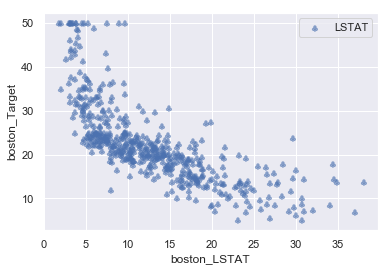

In [141]:
plt.scatter(df_boston.LSTAT , df_boston.target , alpha=0.5, marker=r'$\clubsuit$',
            label="LSTAT")
plt.xlabel("boston_LSTAT")
plt.ylabel("boston_Target")
plt.legend()
plt.show()

### b.	Measure the relative strength of a linear relationship between the df_boston.LSTAT and df_boston.target by calculating the sample correlation coefficient

In [142]:
data = {'LSTAT':df_boston.LSTAT,'target':df_boston.target}
df = pd.DataFrame(data, columns = ['LSTAT','target'])
from scipy import stats # to get PCC(Pearson Correlation Coefficient)

pearson_coef, p_value = stats.pearsonr(df["LSTAT"], df["target"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and  P-value :", p_value) # Results 

Pearson Correlation Coefficient:  -0.7376627261740147 and  P-value : 5.081103394389002e-88


### c.	Give your inference on the relationship between these variables

#### My inference on the relationship between these two variables are highly correlated to each other and the P-Value is  very less approximate to '0'.For the ideal condition the P-Value sholud be <  0.05

## 3)	The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.
## The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


In [143]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
iris = datasets.load_iris()
print(iris.target_names)
print(iris.feature_names)
df_iris =pd.DataFrame(iris.data,columns = iris.feature_names)


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [144]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### a)List the five number summary for 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' 

In [145]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### b)	Construct the boxplot 

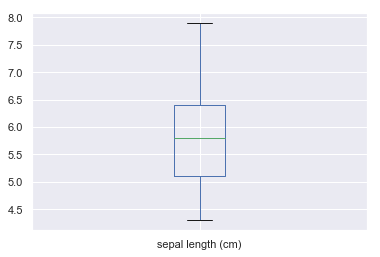

In [146]:
df_iris['sepal length (cm)'].plot.box()

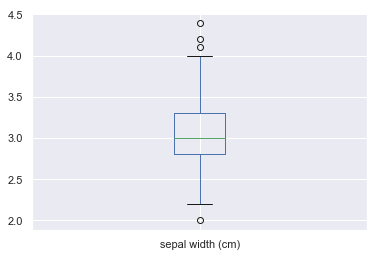

In [147]:
df_iris['sepal width (cm)'].plot.box()

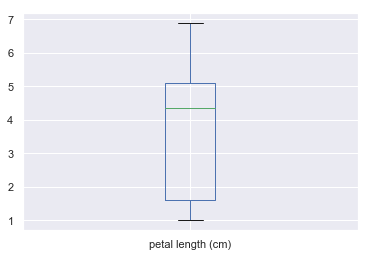

In [148]:
df_iris['petal length (cm)'].plot.box()

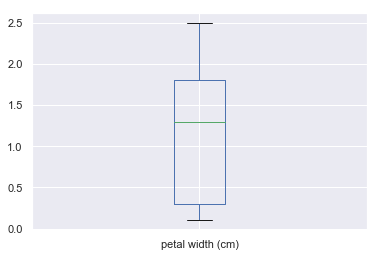

In [149]:
df_iris['petal width (cm)'].plot.box() 

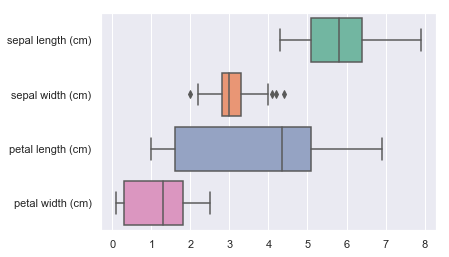

In [150]:
sns.boxplot(data=df_iris, orient="h", palette="Set2")  #horizontal shaped boxplot

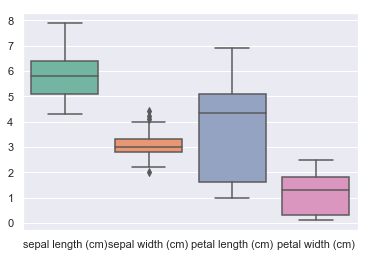

In [151]:
sns.boxplot(data=df_iris, palette="Set2")

### c)Compare the distance between the median and highest value with lowest value and median for each of the above four variables to describe its shape for each of the numerical variables.

sepal length (cm)


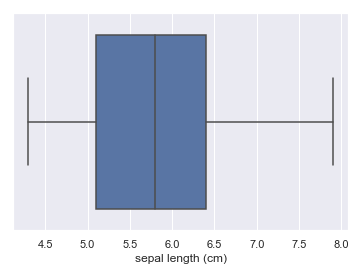

----------------------------------------------------------------------------


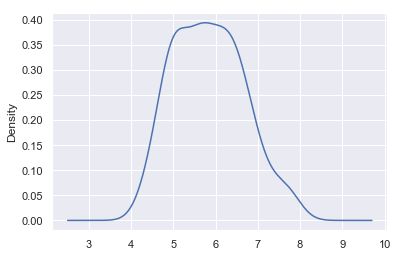

Right skewed
------------------------------------------------------------------------------
sepal width (cm)


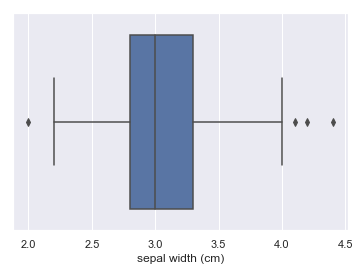

----------------------------------------------------------------------------


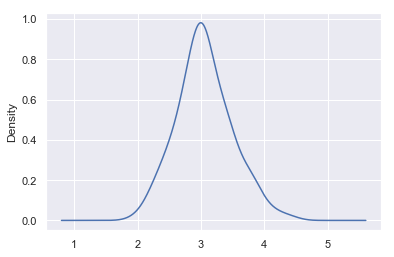

left skewed
------------------------------------------------------------------------------
petal length (cm)


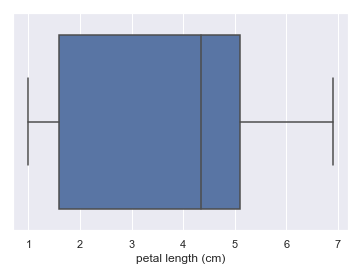

----------------------------------------------------------------------------


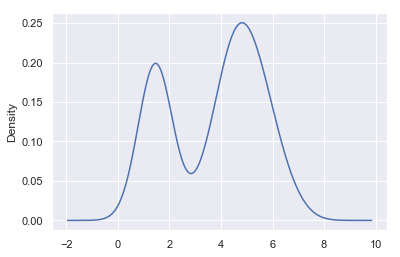

Right skewed
------------------------------------------------------------------------------
petal width (cm)


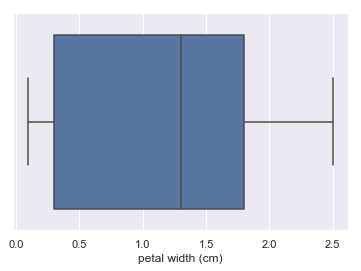

----------------------------------------------------------------------------


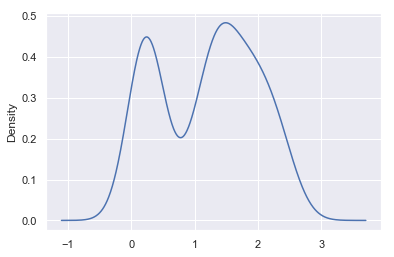

left skewed
------------------------------------------------------------------------------


In [160]:
for i in df_iris.columns:
    print(i)
    sns.boxplot(df_iris[i])
    plt.show()
    print('----------------------------------------------------------------------------')
    df_iris[i].plot.kde()
    plt.show()
    if np.mean(df_iris[i])==np.median(df_iris):
        print('iii.data distribution is symmetrical')
    elif np.mean(df_iris[i])>np.median(df_iris):
        print('Right skewed')
    else:
        print('left skewed')
    print('------------------------------------------------------------------------------')

### 4)	We have a liver disease L and a test T, used to detect the disease. The test is not 100% precise, indicating a person as having the disease when they don't  have the disease (false positive) and not detecting the disease in people that are having (false negatives). 
### Let us assume that 4% of the population has the disease. Our test detects the disease in a patient with liver problem correctly in 95% of the cases. 
### In patients without liver problems, the test detects correctly in 90% of the cases.

### What is the probability of having the liver disease, given a positive test?

In [175]:
## Let P = P(T∣A)
P = (0.9 * 0.04) / ((0.9 * 0.04) + (0.90 * 0.95)) 
print('the probability of having the liver disease, given a positive test %1.4f' % P) 

the probability of having the liver disease, given a positive test 0.0404


## 5)	The length of similar products produced by a company follow a normal distribution model with a mean of  10 cm and a standard deviation of 0.05 cm. 

## If a product is chosen at random


### a) what is the probability that the length of this component is below 10 cm?        


In [221]:
from scipy.stats import norm
print(norm.cdf(10, 10, 0.05))
  


0.5


### b) what is the probability that the length of this component is between 9 and 11 cm? 

In [222]:
from scipy.stats import norm
print(norm.cdf(9, 10, 0.05))


2.7536241186061556e-89


In [223]:
from scipy.stats import norm
print(norm.cdf(11, 10, 0.05))

1.0


### 6)	A group of students want to improve their marks in NEET examination and attended extra coaching classes conducted by their university. Marks scored by these students – before and after are given in the following table to be obtained by running the following python code:

In [164]:

marks_dict  =  {'before':[86, 86, 75, 85, 87, 95, 85, 75, 84, 73, 84, 97, 84, 75,73, 89, 80, 81, 82, 76],
                'after' : [97, 95, 87, 95, 76, 99, 86, 88, 82, 74, 80, 95, 90, 77,75, 76, 75, 80, 84, 75]}
marks_df   =  pd.DataFrame(marks_dict)
print(marks_df)



    before  after
0       86     97
1       86     95
2       75     87
3       85     95
4       87     76
5       95     99
6       85     86
7       75     88
8       84     82
9       73     74
10      84     80
11      97     95
12      84     90
13      75     77
14      73     75
15      89     76
16      80     75
17      81     80
18      82     84
19      76     75


### a)State your null and alternative hypothesis 

In [199]:
print( marks_df['before'].mean() )

82.6


In [200]:
print( marks_df['after'].mean() )

84.3


### b)	Test the hypothesis and Calculate the p-value

In [201]:
stats.ttest_rel(a = marks_df['before'],
                b = marks_df['after'])

Ttest_relResult(statistic=-1.067227865230483, pvalue=0.2992424126910259)

In [202]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=19)  # Degrees of freedom

-2.0930240544082634

In [203]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.009575234489209

In [204]:
stats.t.cdf(x=0.29,      # T-test statistic
               df= 19) * 2   # Mupltiply by two for two tailed test*

1.2250425283276773

### c).	At the 5% level of significance, is there evidence that the marks scored after attending the coaching classes is higher than before attending the coaching classes?  

In [207]:
sigma = marks_df['after'].std()/math.sqrt(50)  #sample size

stats.t.interval(0.05,     # Confidence level
                 df = 19,  # Degrees of freedom
                 loc = marks_df['after'].mean(),
                 scale= sigma)                # Standard dev estimate

(84.22352346590237, 84.3764765340067)

In [208]:
stats.t.interval(0.95,                        # Confidence level
                 df = 19,                     # Degrees of freedom
                 loc = marks_df['after'].mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(81.78085483868524, 86.81914516131475)

### d.)	Plot the histogram for the differences in marks. Give your inference on the distribution of difference in marks? Is the assumption of paired t test violated

In [209]:
marks_df['diff'] = marks_df['after'] - marks_df['before']
#marks_df['diff']

before


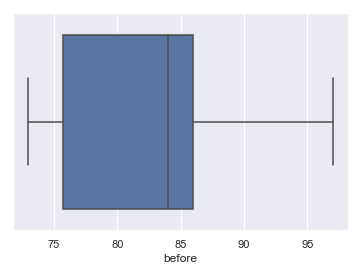

--------------------------------------------------


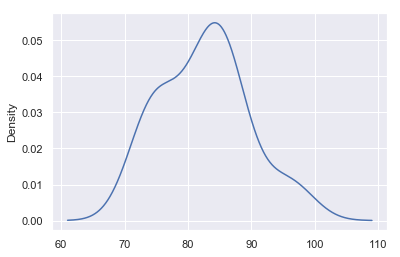

Right skewed
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
after


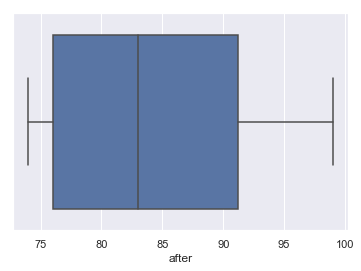

--------------------------------------------------


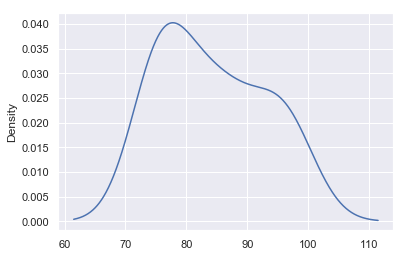

Right skewed
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
diff


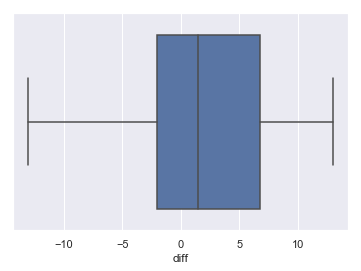

--------------------------------------------------


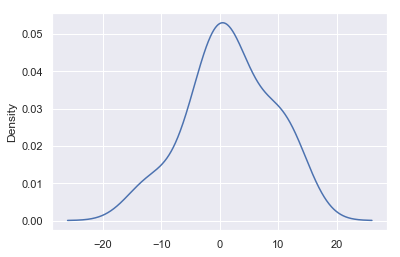

left skewed
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [214]:
for i in marks_df.columns:
    print(i)
    sns.boxplot(marks_df[i])
    plt.show()
    print('-'*50)
    marks_df[i].plot.kde()
    plt.show()
    if np.mean(marks_df[i])==np.median(marks_df):
        print('iii. data distribution is symmetrical')
    elif np.mean(marks_df[i])>np.median(marks_df):
        print('Right skewed')
    else:
        print('left skewed')
    print('--'*200)


## 7)	A company an experiment 10 times, each with an estimated probability of success of 0.2. All ten experiments fail. What is the probability of that happening? 

## 8)	The file BodyWeight.csv contains results from an experiment to compare weights in kgs (as measured by weight of over-weight participants after undergoing a weight reduction program) obtained under a control and three different treatment conditions. 
## We have a data of 40 cases on 2 variables, weight, numeric and group, a factor variable with four levels ctrl, trt1, trt2 and trt3.


In [186]:
bodyweight = pd.read_csv('BodyWeight.csv')

In [187]:
bodyweight.head()

,Unnamed: 0,weight,group
0,1,125.1,ctrl
1,2,167.4,ctrl
2,3,155.4,ctrl
3,4,183.3,ctrl
4,5,135.0,ctrl


### a.)	Judge by the Boxplot and state if there are differences in the weight of the participants for the three treatments.  

#### All the distrubutions are in skewed data
#### for ctr1- this level ranges from the 120-185-- no outliers in the data

#### for trt1- this level ranges from the 110-135-- outliers in the data

#### for trt2- this level ranges from the 150-190-- no outliers in the data

#### for trt3- this level ranges from the 85-170-- no outliers in the data

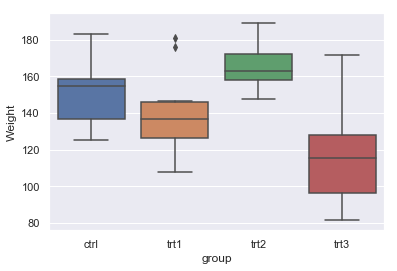

In [220]:
sns.set()
sns.boxplot(x='group',y='weight',data=bodyweight)

# Label the axes
plt.xlabel('group')
plt.ylabel('Weight')

# Show the plot
plt.show()

### b).	Perform a one-way ANOVA and draw your inferences about if there is any significant difference in weight due to the groups. 

In [216]:
import statsmodels
import statsmodels.api as sm
from   statsmodels.formula.api  import  ols

In [217]:
bodyweight.head()

,Unnamed: 0,weight,group
0,1,125.1,ctrl
1,2,167.4,ctrl
2,3,155.4,ctrl
3,4,183.3,ctrl
4,5,135.0,ctrl


In [218]:
formula = 'weight~ C(group)'
model = ols(formula, data=bodyweight).fit()
print(model.summary())
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     10.56
Date:                Tue, 08 Jan 2019   Prob (F-statistic):           3.98e-05
Time:                        13:55:26   Log-Likelihood:                -176.37
No. Observations:                  40   AIC:                             360.7
Df Residuals:                      36   BIC:                             367.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          150.9600      6.631  

### c.	Write your null and alternative hypothesis

### d)	Write your conclusion based on the p-value

### e)	What are the assumptions of a ANOVA model? 

#### 1) All populations involved follow a normal distribution
#### 2) All populations have the same variance
#### 3) The samples are randomly selected and independent of one another
    